In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [3]:
# Load example data
full_wt_df = pd.read_csv('../data/sortseq/full-wt/data.txt',delim_whitespace=True)

full_500_df = pd.read_csv('../data/sortseq/full-500/data.txt',delim_whitespace=True)
# rnap_wt_df = pd.read_csv('../data/sortseq/rnap-wt/data.txt',delim_whitespace=True)
# crp_wt_df = pd.read_csv('../data/sortseq/crp-wt/data.txt',delim_whitespace=True)

# # Separate test from data_df
# ix_test = data_df['set']=='test'
# test_df = data_df[ix_test].reset_index(drop=True)
# print(f'test N: {len(test_df):,}')

# # Remove test data from data_df
# data_df = data_df[~ix_test].reset_index(drop=True)
# print(f'training + validation N: {len(data_df):,}')


In [ ]:
data_df = full_wt_df.merge(full_500_df,on='seq',how='outer').fillna(0)

In [13]:
y_cols = list(np.arange(0,15,1).astype(str))
cols = list(np.arange(0,15,1).astype(str))
cols.insert(0,'x')
data_df.columns = cols

In [14]:
data_df

,x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAAAAATCTGAGTTAGCTTACTCATTAGGCACCCCAGGCTTGACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAATCTGAGTTTGCTCACTCTATCGGCACCCCAGTCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72488,TTTTCATTAGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTATAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72489,TTTTGATGTGAGCTATTTCACTCTTTAGGCTCCCAAGGATTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72490,TTTTTATGTGAGTTAGATCACTCATTAGGCACCTCATGCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72491,TTTTTATGTGAGTTAGCTCACTCGTTAGGCACCTCACGCTTTGCAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [15]:
X = data_df['x']
y = data_df[y_cols]

In [16]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A','C','G','T']

#y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

# get test set data.

L=75, Y=15


In [18]:
# instantiate gpmap object
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

#therodynamic_gpmap = ThermodynamicLayer(alphabet=alphabet,**gpmap_kwargs)

2022-05-24 13:53:00.111932: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# I think this shouldn't require any positional arguments.
# mp_GE = mavenn.measurement_process_layers.GlobalEpistasisLayer(K=50,
#                                                                eta=1e-5,
#                                                                monotonic=True)
full_wt_mp = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=10,
                                                                      K=50,
                                                                      eta=1e-5,)

full_500_mp = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=4,
                                                                      K=50,
                                                                      eta=1e-5,)


In [20]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[full_wt_mp, full_500_mp])

ValueError: Exception encountered when calling layer "discrete_agnostic_mp_1" (type DiscreteAgnosticMP).

in user code:

    File "/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn/mavenn/src/layers/measurement_process_layers.py", line 1059, in call  *
        negative_log_likelihood = -K.sum(ct_my * Log(p_my), axis=1)

    ValueError: Dimensions must be equal, but are 10 and 4 for '{{node discrete_agnostic_mp_1/mul_2}} = Mul[T=DT_FLOAT](discrete_agnostic_mp_1/strided_slice_1, discrete_agnostic_mp_1/Log)' with input shapes: [?,10], [?,4].


Call arguments received:
  • inputs=tf.Tensor(shape=(None, 11), dtype=float32)

In [13]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 330)]       0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 300)          0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           301         ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [14]:
#x_train,y_train
y_train[y_cols[0:10]]

,0,1,2,3,4,5,6,7,8,9
43836,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45536,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Set training data
model.set_data(x=x_train,
               y_list=[y_train[y_cols[0:10]].values,y_train[y_cols[10:20]].values,y_train[y_cols[20:30]].values],
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 111,432 observations set as training data.
Using 19.9% for validation.
Time to set data: 2.67 sec.


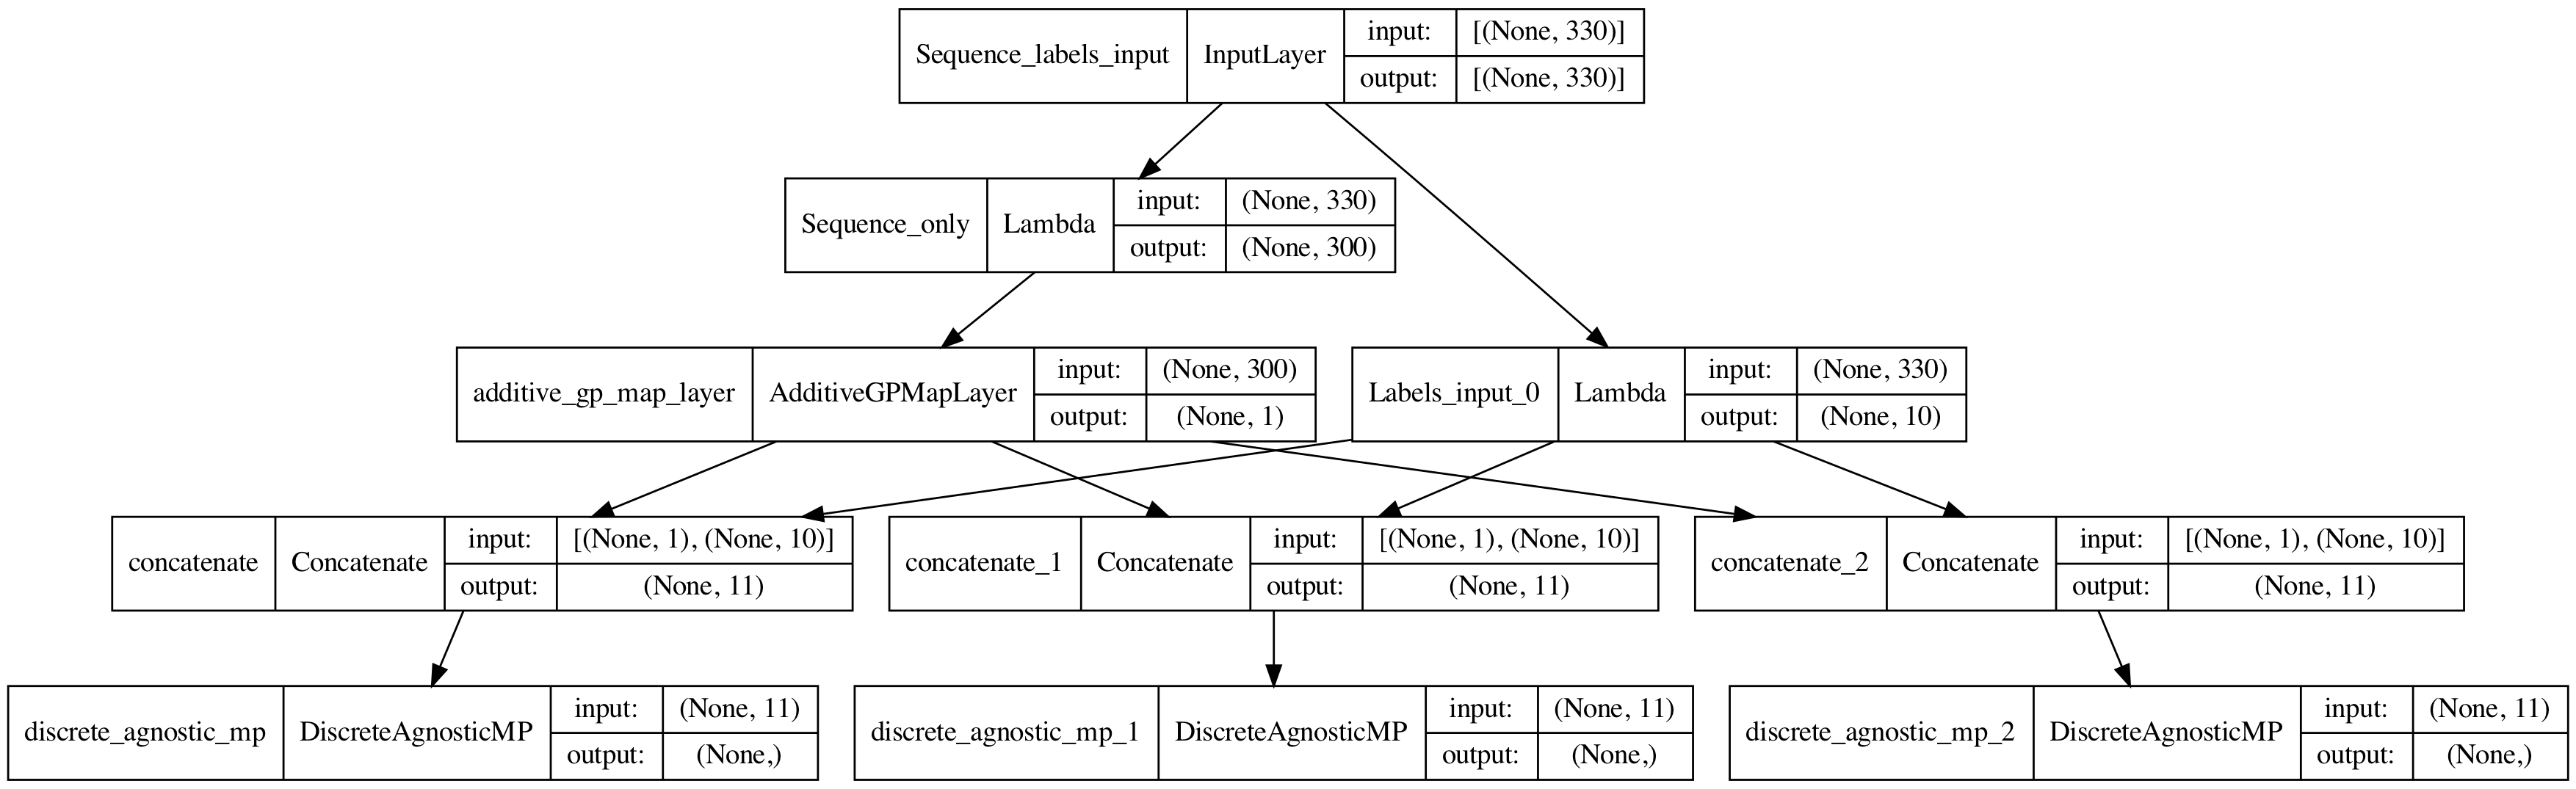

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='multiheaded_discrete_agnostic.png')

In [17]:

# Fit model to data
model.fit(learning_rate=.005,
          epochs=50,
          batch_size=1000,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/50
90/90 [==============================] - 4s 19ms/step - loss: 3211.7854 - discrete_agnostic_mp_loss: 1070.5771 - discrete_agnostic_mp_1_loss: 1070.6359 - discrete_agnostic_mp_2_loss: 1070.5485 - I_var: 0.1394 - val_loss: 2960.9734 - val_discrete_agnostic_mp_loss: 986.7310 - val_discrete_agnostic_mp_1_loss: 987.2739 - val_discrete_agnostic_mp_2_loss: 986.9421 - val_I_var: 0.3701
Epoch 2/50
90/90 [==============================] - 1s 14ms/step - loss: 2865.0564 - discrete_agnostic_mp_loss: 954.9924 - discrete_agnostic_mp_1_loss: 955.0103 - discrete_agnostic_mp_2_loss: 955.0239 - I_var: 0.4793 - val_loss: 2785.0459 - val_discrete_agnostic_mp_loss: 928.2996 - val_discrete_agnostic_mp_1_loss: 928.2354 - val_discrete_agnostic_mp_2_loss: 928.4786 - val_I_var: 0.5443
Epoch 3/50
90/90 [==============================] - 1s 14ms/step - loss: 2817.9849 - discrete_agnostic_mp_loss: 939.3002 - discrete_agnostic_mp_1_loss: 939.2391 - discrete_agnostic_mp_2_loss: 939.4098 - I_var: 0.5289 - 

90/90 [==============================] - 2s 19ms/step - loss: 2713.5669 - discrete_agnostic_mp_loss: 904.4896 - discrete_agnostic_mp_1_loss: 904.6611 - discrete_agnostic_mp_2_loss: 904.3411 - I_var: 0.6314 - val_loss: 2687.0063 - val_discrete_agnostic_mp_loss: 895.6489 - val_discrete_agnostic_mp_1_loss: 895.9625 - val_discrete_agnostic_mp_2_loss: 895.3187 - val_I_var: 0.6391
Epoch 23/50
90/90 [==============================] - 2s 20ms/step - loss: 2713.8320 - discrete_agnostic_mp_loss: 904.5972 - discrete_agnostic_mp_1_loss: 904.8517 - discrete_agnostic_mp_2_loss: 904.3066 - I_var: 0.6332 - val_loss: 2686.8757 - val_discrete_agnostic_mp_loss: 895.6259 - val_discrete_agnostic_mp_1_loss: 896.0589 - val_discrete_agnostic_mp_2_loss: 895.1139 - val_I_var: 0.6366
Epoch 24/50
90/90 [==============================] - 1s 16ms/step - loss: 2709.7312 - discrete_agnostic_mp_loss: 903.2310 - discrete_agnostic_mp_1_loss: 903.3087 - discrete_agnostic_mp_2_loss: 903.1143 - I_var: 0.6349 - val_loss: 26

Epoch 43/50
90/90 [==============================] - 1s 15ms/step - loss: 2707.9294 - discrete_agnostic_mp_loss: 902.6211 - discrete_agnostic_mp_1_loss: 902.7266 - discrete_agnostic_mp_2_loss: 902.4910 - I_var: 0.6365 - val_loss: 2682.2791 - val_discrete_agnostic_mp_loss: 894.1597 - val_discrete_agnostic_mp_1_loss: 893.9108 - val_discrete_agnostic_mp_2_loss: 894.1167 - val_I_var: 0.6400
Epoch 44/50
90/90 [==============================] - 2s 19ms/step - loss: 2707.3857 - discrete_agnostic_mp_loss: 902.4402 - discrete_agnostic_mp_1_loss: 902.5406 - discrete_agnostic_mp_2_loss: 902.3131 - I_var: 0.6356 - val_loss: 2683.3433 - val_discrete_agnostic_mp_loss: 894.5321 - val_discrete_agnostic_mp_1_loss: 894.0648 - val_discrete_agnostic_mp_2_loss: 894.6539 - val_I_var: 0.6364
Epoch 45/50
90/90 [==============================] - 2s 21ms/step - loss: 2705.9932 - discrete_agnostic_mp_loss: 901.9275 - discrete_agnostic_mp_1_loss: 902.0483 - discrete_agnostic_mp_2_loss: 901.9240 - I_var: 0.6375 - 

On test data:


Text(0.5, 1.0, 'training hisotry')

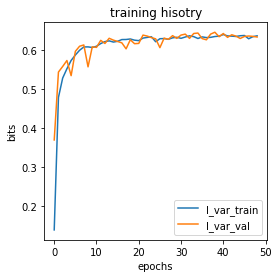

In [18]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')

In [21]:
phi = gpmap.x_to_phi(x_test)

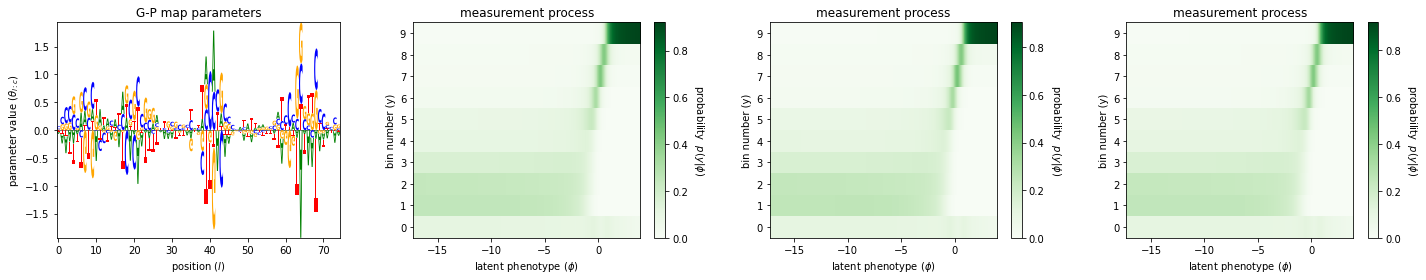

In [28]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
#phi_lim = [-5, 3]
phi_lim = [min(phi), max(phi)]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = 10    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process_1 = mp_mpa_1.p_of_y_given_phi(y_all, phi_grid)
measurement_process_2 = mp_mpa_2.p_of_y_given_phi(y_all, phi_grid)
measurement_process_3 = mp_mpa_3.p_of_y_given_phi(y_all, phi_grid)

#measurement_process = np.hstack([measurement_process_1,measurement_process_2,measurement_process_3])

# Create figure with two panels
fig, axs = plt.subplots(1,4,figsize=[20,4])

# Left panel: draw logo using logomaker
ax = axs[0]
logo = logomaker.Logo(-pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters')

ax = axs[1]
im = ax.imshow(measurement_process_1,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

ax = axs[2]
im = ax.imshow(measurement_process_2,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")


ax = axs[3]
im = ax.imshow(measurement_process_3,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")


# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('sortseq_multiheaded_discrete_agnostic_visualization.png',dpi=200,bbox_inches='tight')
plt.show()